# Major Leagues

In [1]:
import pandas as pd
import numpy as np

df_mlb=pd.read_csv("../data/mlb_elo.csv")
df_mlb_latest=pd.read_csv("../data/mlb_elo_latest.csv")

## MLB DataFrame

In [2]:
print(df_mlb.head(10))

         date  season  neutral playoff team1 team2     elo1_pre     elo2_pre  \
0  2019-10-30    2019        0       w   HOU   WSN  1599.542804  1584.363378   
1  2019-10-29    2019        0       w   HOU   WSN  1605.069000  1578.837182   
2  2019-10-27    2019        0       w   WSN   HOU  1584.005206  1599.900976   
3  2019-10-26    2019        0       w   WSN   HOU  1589.985555  1593.920627   
4  2019-10-25    2019        0       w   WSN   HOU  1593.827376  1590.078806   
5  2019-10-23    2019        0       w   HOU   WSN  1597.491698  1586.414484   
6  2019-10-22    2019        0       w   HOU   WSN  1599.986054  1583.920128   
7  2019-10-19    2019        0       l   HOU   NYY  1597.688468  1586.936089   
8  2019-10-18    2019        0       l   NYY   HOU  1583.765417  1600.859140   
9  2019-10-17    2019        0       l   NYY   HOU  1588.485661  1596.138896   

   elo_prob1  elo_prob2   ...    pitcher1_rgs  pitcher2_rgs  pitcher1_adj  \
0   0.574617   0.425383   ...       56.920

## MBL Latest DataFrame

In [3]:
print(df_mlb_latest.head(10))

         date  season  neutral playoff team1 team2     elo1_pre     elo2_pre  \
0  2019-10-30    2019        0       w   HOU   WSN  1599.542804  1584.363378   
1  2019-10-29    2019        0       w   HOU   WSN  1605.069000  1578.837182   
2  2019-10-27    2019        0       w   WSN   HOU  1584.005206  1599.900976   
3  2019-10-26    2019        0       w   WSN   HOU  1589.985555  1593.920627   
4  2019-10-25    2019        0       w   WSN   HOU  1593.827376  1590.078806   
5  2019-10-23    2019        0       w   HOU   WSN  1597.491698  1586.414484   
6  2019-10-22    2019        0       w   HOU   WSN  1599.986054  1583.920128   
7  2019-10-19    2019        0       l   HOU   NYY  1597.688468  1586.936089   
8  2019-10-18    2019        0       l   NYY   HOU  1583.765417  1600.859140   
9  2019-10-17    2019        0       l   NYY   HOU  1588.485661  1596.138896   

   elo_prob1  elo_prob2   ...    pitcher1_rgs  pitcher2_rgs  pitcher1_adj  \
0   0.574617   0.425383   ...       56.920

# Clean Data

In [32]:
print(df_mlb.isna().score1.any())
print(df_mlb.isna().score2.any())

False
False


# Feature Engineering

In [4]:
teams = df_mlb['team1']. unique()
teams

array(['HOU', 'WSN', 'NYY', 'STL', 'LAD', 'ATL', 'TBD', 'MIN', 'OAK',
       'KCR', 'SEA', 'NYM', 'COL', 'CHW', 'ARI', 'TOR', 'ANA', 'TEX',
       'SFG', 'PIT', 'PHI', 'BOS', 'SDP', 'DET', 'CIN', 'CLE', 'CHC',
       'MIL', 'FLA', 'BAL', 'WS9', 'BL2', 'CL3', 'LS2', 'PHP', 'ML3',
       'BSP', 'CL6', 'CN3', 'PH4', 'SR2', 'RC2', 'TL2', 'BR4', 'IN3',
       'KC2', 'WS8', 'DTN', 'NY4', 'SLU', 'KCN', 'BFN', 'PRO', 'RIC',
       'CL2', 'TL1', 'CL5', 'IN2', 'WS7', 'WOR', 'TRN', 'CN1', 'SR1',
       'ML1', 'IN1', 'SL2', 'LS1', 'HR1', 'NY2', 'PH1', 'NH1', 'PH2',
       'BR2', 'SL1', 'KEO', 'WS6', 'PH3', 'BL1', 'WS5', 'ELI', 'BL4',
       'BR1', 'CL1', 'MID', 'TRO', 'WS4', 'WS3', 'FW1', 'RC1'],
      dtype=object)

In [5]:
avgAway=df_mlb.groupby('team2').score2.mean()

In [6]:
avgAwayList=[]
for x in range(0, len(avgAway)):
    avgAwayList.append(avgAway[x])

In [7]:
avgHome=df_mlb.groupby(['team1']).score1.mean()

In [8]:
avgHomeList=[]
for x in range(0, len(avgHome)):
    avgHomeList.append(avgHome[x])

Plot without regression line

In [9]:
import matplotlib.pyplot as plt
plt.scatter(avgHomeList, avgAwayList)

In [10]:
dict = {'Home': avgHomeList, 'Away': avgAwayList}   
df_Scores = pd.DataFrame(dict) 
df_Scores.head(10)

,Home,Away
0,4.248897,4.418251
1,4.803106,4.289284
2,4.654961,4.415851
3,4.394303,4.226244
4,6.018576,4.588589
5,10.684211,7.825581
6,6.706522,5.362434
7,3.000000,4.600000
8,4.972006,4.357090
9,5.357143,5.071429


In [11]:
X = df_Scores['Home'].values.reshape(-1,1)
y = df_Scores['Away'].values.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[1.64542852]
[[0.57601894]]


In [15]:
y_pred = regressor.predict(X_test)
y_pred

array([[4.32677429],
       [4.44807793],
       [7.61109835],
       [4.94920232],
       [4.31549425],
       [4.05254902],
       [4.57160473],
       [4.2146648 ],
       [4.59450751],
       [4.1015132 ],
       [3.37348533],
       [5.09496659],
       [4.06470806],
       [4.1589657 ],
       [4.50939836],
       [6.39758476],
       [5.18801151],
       [5.67244547]])

In [16]:
y_pred = [y for x in y_pred for y in x]
y_test = [y for x in y_test for y in x]
X_test = [y for x in X_test for y in x]
X_train = [y for x in X_train for y in x]
y_train = [y for x in y_train for y in x]

In [17]:
dict = {'Actual': y_test, 'Predicted': y_pred}   
df_pred = pd.DataFrame(dict) 
df_pred
 

,Actual,Predicted
0,4.415851,4.326774
1,4.367187,4.448078
2,7.675676,7.611098
3,4.883929,4.949202
4,4.606003,4.315494
5,4.253413,4.052549
6,3.583333,4.571605
7,4.407769,4.214665
8,4.214724,4.594508
9,4.106083,4.101513


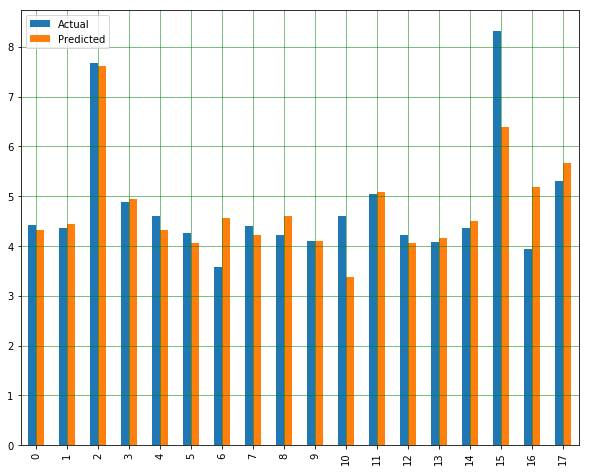

In [18]:
df_pred.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.41903861474218224
Mean Squared Error: 0.458296497664083
Root Mean Squared Error: 0.6769759948950058


## Linear Regression

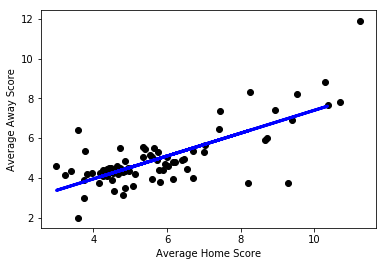

In [20]:
plt.scatter(avgHome, avgAway,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel("Average Home Score")
plt.ylabel("Average Away Score")
plt.show()

In [21]:
list1=df_mlb['team1'].unique()
list1=list(list1)
list1=sorted(list1)

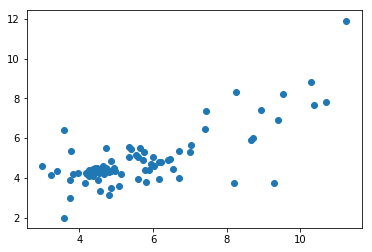

In [22]:
df = pd.DataFrame({'Home': avgHomeList, 'Away': avgAwayList}, index=list1)
fig,ax=plt.subplots()
plt.scatter(df['Home'], df['Away'])
plt.show()


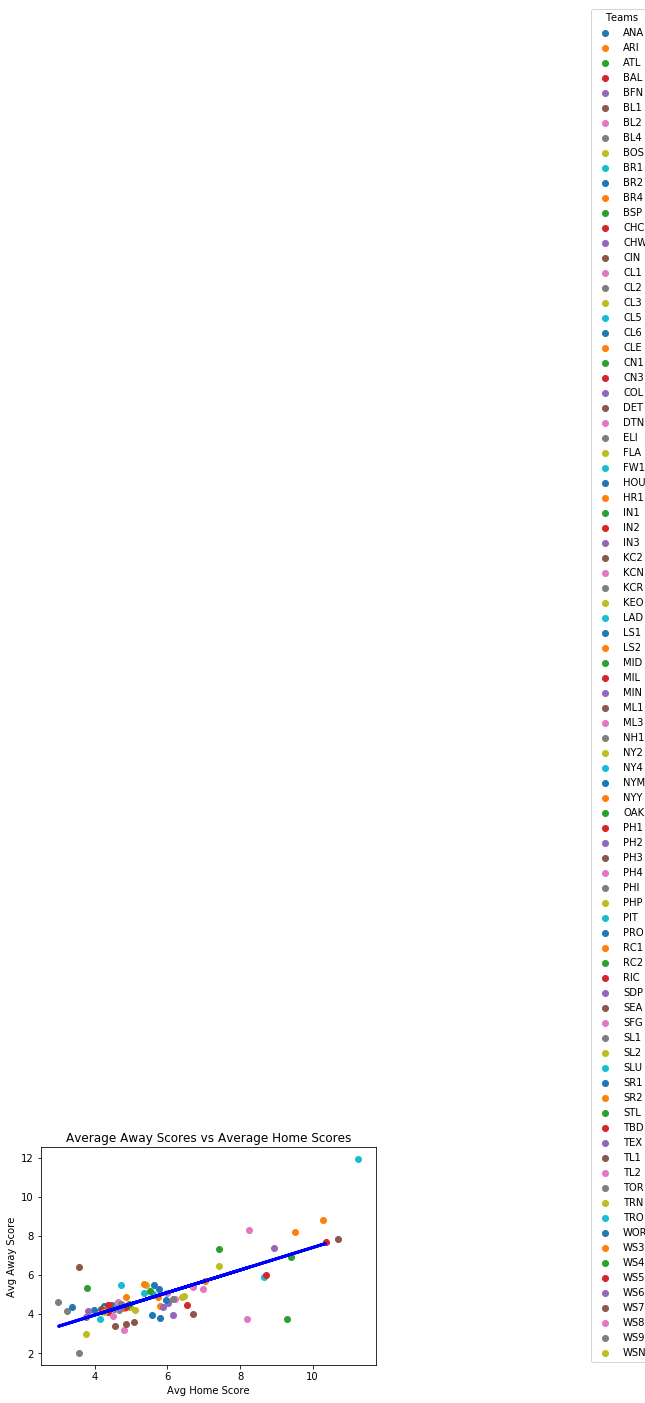

In [23]:
for name,row in df.iterrows():
  plt.scatter(row['Home'],row['Away'], label=name)
plt.title("Average Away Scores vs Average Home Scores")
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Avg Home Score')
plt.ylabel('Avg Away Score')
plt.legend(title="Teams")
leg = plt.legend( loc = 'lower right', title="Teams")

plt.draw() # Draw the figure so you can find the positon of the legend. 
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
# Change to location of the legend. 
xOffset = .8
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
plt.show()

In this plot, each point represents a team. The x-axis represents the average home score while the y-axis represents the average away score.I used the data to calculate the average score for each team's away and homes games. I used these averages to predict and calculate averages for the regression line. The blue regression line shows that a team scores higher during home games compared to away games.

## Gradient Boosting Regression

In [24]:
from sklearn import ensemble
from sklearn import linear_model

[ 0.08907716 -0.08089115  0.06457733 -0.06527375  0.29050915  0.20086394
 -0.98827139  0.19310456 -0.37978359  0.00456952  1.22651467 -0.04066795
  0.15347376 -0.07563237 -0.15230877  1.92499588 -1.24187891 -0.37030122]


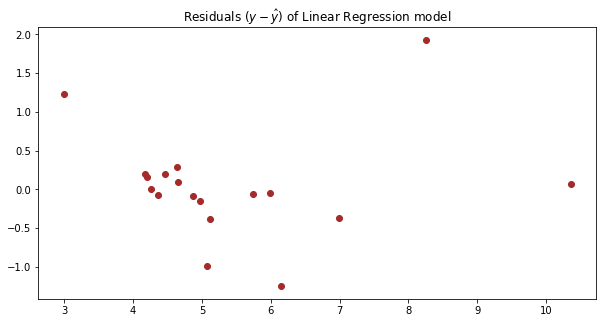

In [25]:
plt.figure(figsize=(10, 5))
plt.title("Residuals $(y - \hat{y})$ of Linear Regression model")
arr=np.array(y_test)-np.array(y_pred)
#list1=y_test-y_pred
print(arr)
plt.scatter(X_test,arr, color='brown')
plt.show()

In [26]:
params = {
    'n_estimators': 500,
    'max_depth': 4,
    'learning_rate': 1,
    'criterion': 'mse'
}
x=np.array(X_test)
x=x.reshape(-1, 1)
y=np.array(y_pred)
y=y.reshape(-1, 1)
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(x, y)

C:\Users\Sandy\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

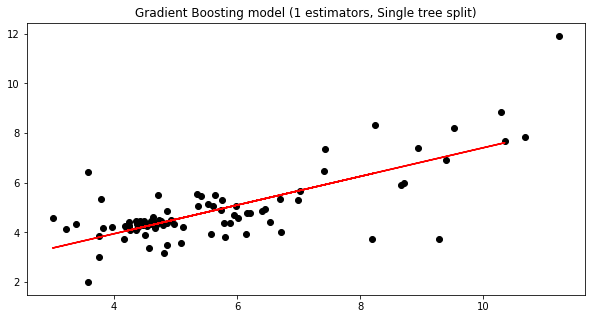

In [27]:
plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(avgHome, avgAway,  color='black')
plt.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()

The gradient boosting regression exhibits similar conclusions as the linear regression.

# Conclusions:
I used linear regression and gradient boosting to predict the average score for a home game and away game for each team. I found each team's average home and away scores and plotted them. I then used regression and gradient boosting to create the line of best fit for this plot. Both types of regression prove that a team scores better when they play at home rather than when they play away.